In [1]:
# training: the rest, testing: last 12 months

In [2]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_csv('Ventas.csv')

In [4]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head(10)

,Date,Item Code,Item Desc,Category,Quantity,Total,Month
0,1/1/17,150,BAVIERA X 1,Tapas,6.0,750.0,1
1,1/1/17,151,BAVIERA X 2,Tapas,8.0,1920.0,1
2,1/1/17,59,BRUSQUETA HONG,Apetizers,6.0,570.0,1
3,1/1/17,58,BRUSQUETAS CRUD,Apetizers,9.0,720.0,1
4,1/1/17,78,C. CAPRESSE,Pizzas,6.0,510.0,1
5,1/1/17,79,C. CRUDO RUCULA,Pizzas,2.0,190.0,1
6,1/1/17,71,C. FUGAZZETA,Pizzas,2.0,160.0,1
7,1/1/17,75,C. JAMON,Pizzas,2.0,170.0,1
8,1/1/17,80,C. JAMON Y MORR,Pizzas,2.0,180.0,1
9,1/1/17,77,C. MORRONES,Pizzas,1.0,85.0,1


In [5]:
df = df.drop(['Item Code', 'Item Desc', 'Quantity'], axis=1)

In [6]:
df.head(10)

,Date,Category,Total,Month
0,1/1/17,Tapas,750.0,1
1,1/1/17,Tapas,1920.0,1
2,1/1/17,Apetizers,570.0,1
3,1/1/17,Apetizers,720.0,1
4,1/1/17,Pizzas,510.0,1
5,1/1/17,Pizzas,190.0,1
6,1/1/17,Pizzas,160.0,1
7,1/1/17,Pizzas,170.0,1
8,1/1/17,Pizzas,180.0,1
9,1/1/17,Pizzas,85.0,1


In [7]:
df.sort_values(["Category", "Date"], axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

In [8]:
apetizer = df
apetizer = apetizer[apetizer.Category == 'Apetizers'][['Date', 'Month', 'Total', 'Category']]
apetizer['Date'] = pd.to_datetime(apetizer.Date)
apetizer = apetizer.sort_values('Date')
apetizer.head(10)

,Date,Month,Total,Category
2,2017-01-01,1,570.0,Apetizers
3,2017-01-01,1,720.0,Apetizers
17,2017-01-01,1,2600.0,Apetizers
47,2017-01-01,1,2805.0,Apetizers
64,2017-01-01,1,3500.0,Apetizers
84,2017-02-01,2,2500.0,Apetizers
114,2017-02-01,2,3060.0,Apetizers
124,2017-02-01,2,3040.0,Apetizers
125,2017-02-01,2,645.0,Apetizers
126,2017-02-01,2,1200.0,Apetizers


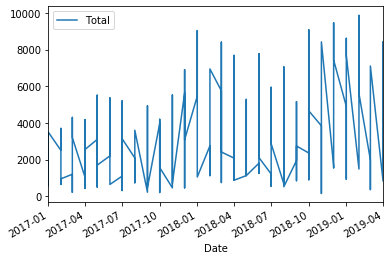

In [9]:
apetizer.plot.line(x = 'Date', y = 'Total')
plt.show()

In [10]:
# apetizer.index
apetizer.size

884

In [11]:
# pd.DatetimeIndex.freq = 'M'

In [12]:
apetizer['Date'] = pd.to_datetime(apetizer['Date'])
# apetizer.set_index('Month', inplace=True)

In [13]:
# train, test = apetizer.iloc[:100, 0], apetizer.iloc[99:, 0] 
# print(apetizer.size)
# print(train.size)
apetizer = pd.DataFrame(apetizer, columns=['Date','Total']).set_index('Date')
apetizer.head()
# apetizer.set_index('Date', inplace=True)

,Total
Date,
2017-01-01,570.0
2017-01-01,720.0
2017-01-01,2600.0
2017-01-01,2805.0
2017-01-01,3500.0


In [14]:
# split data
train = apetizer.iloc[:-24, 0]
test = apetizer.iloc[-24:, 0]

train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [15]:
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
model = model.fit()
model2 = model2.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


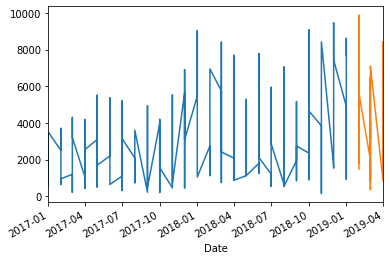

In [16]:
# plt.plot(train.index, train, label = 'Train')
# plt.plot(test.index, test, label = 'Test')

train.plot.line(x = 'Date', y = 'Total')
test.plot.line(x = 'Date', y = 'Total')

In [17]:
print(test.index[0], test.index[-1])
print(type(test.index[0]))
print(type(test))
# pd.date_range(apetizer.beginning_date.min(), apetizer.end_date.max())
# pred = model.predict(start=864, end=884)
pred = model.forecast(24)
pred2 = model2.forecast(24)

2019-02-01 00:00:00 2019-04-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.series.Series'>


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [18]:
# In fit1, we use additive trend, additive seasonal of period season_length=4 and a Box-Cox transformation.
# In fit2, we use additive trend, multiplicative seasonal of period season_length=4 and a Box-Cox transformation.
# In fit3, we use additive damped trend, additive seasonal of period season_length=4 and a Box-Cox transformation.
# In fit4, we use additive damped trend, multiplicative seasonal of period season_length=4 and a Box-Cox transformation.


fit1 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)

fit1.fittedvalues.plot(style='--', color='red')
fit2.fittedvalues.plot(style='--', color='green')
fit3.fittedvalues.plot(style='--', color='yellow')
fit4.fittedvalues.plot(style='--', color='black')

fit1.forecast(100).plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(300).plot(style='--', marker='o', color='green', legend=True)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

ValueError: year 0 is out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11abd40d0> (for post_execute):


ValueError: year 0 is out of range

ValueError: year 0 is out of range

In [ ]:
print("Forecasting sales of properties using Holt-Winters method with additive seasonality.")